### Importamos las librerias que vamos a necesitar

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from math import sqrt

### Time Series Regression - energy

In [22]:
# abrimos nuestro dataset original
data = pd.read_csv("dataset/data.csv")

In [23]:
data.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [24]:
# dropeamos las columnas que no necesitamos
data_energy = data.drop(columns=["valence", "acousticness", "danceability","instrumentalness","liveness","speechiness","artists","duration_ms","explicit","id","key","loudness","mode","name","popularity","release_date","tempo"])

In [25]:
data_energy.head(5)

,year,energy
0,1921,0.211
1,1921,0.341
2,1921,0.166
3,1921,0.309
4,1921,0.193


In [26]:
# Utilizmos la función datetime para hacer un time series
data_energy["year"]=pd.to_datetime(data_energy["year"], format='%Y', errors='ignore')
data_energy["year"]

0        1921-01-01
1        1921-01-01
2        1921-01-01
3        1921-01-01
4        1921-01-01
            ...    
170648   2020-01-01
170649   2020-01-01
170650   2020-01-01
170651   2020-01-01
170652   2020-01-01
Name: year, Length: 170653, dtype: datetime64[ns]

In [27]:
# Ponemos la serie temporal como índice
data_energy.index = data_energy["year"]
data_energy.head(5)

,year,energy
year,,
1921-01-01,1921-01-01,0.211
1921-01-01,1921-01-01,0.341
1921-01-01,1921-01-01,0.166
1921-01-01,1921-01-01,0.309
1921-01-01,1921-01-01,0.193


In [28]:
### Dropeamos la columna year ya que la tenemos como índice
data_energy_s = data_energy.drop(columns=["year"])
data_energy_s.head()

,energy
year,
1921-01-01,0.211
1921-01-01,0.341
1921-01-01,0.166
1921-01-01,0.309
1921-01-01,0.193


In [29]:
# hacemos un groupby por año y media
data_energy_s_m=data_energy_s.groupby(['year']).mean()

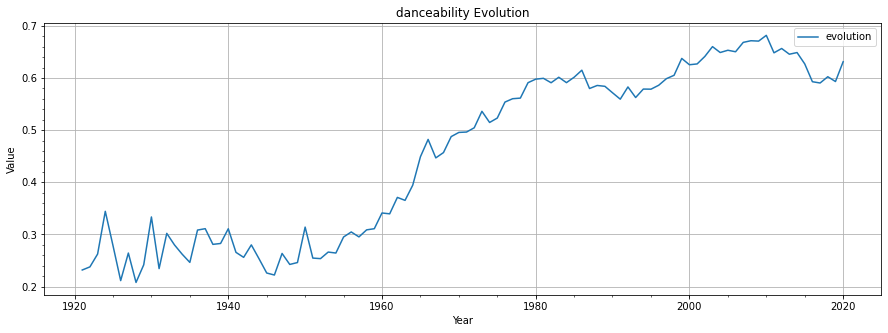

In [31]:
# hacemos un plot para ver la evolución de la variable
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(data_energy_s_m, label="evolution")
plt.xlabel('Year') 
plt.ylabel('Value')
plt.legend()
plt.title("danceability Evolution");

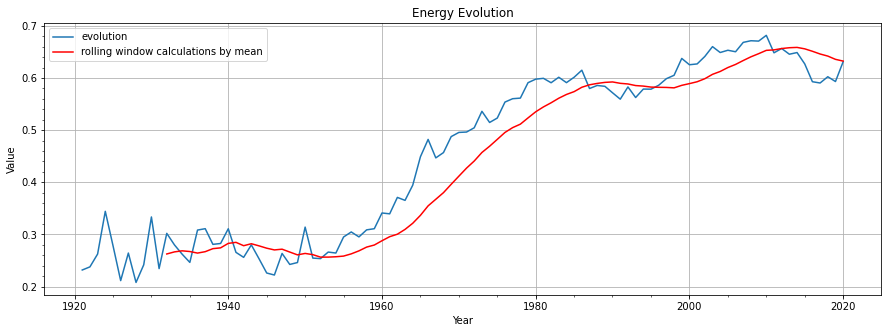

In [33]:
# hacemos un plot para ver la evolución de la variable con un rolling window calculations por la media
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(data_energy_s_m, label="evolution")
plt.plot(data_energy_s_m.rolling(window=12).mean(), c="r", label="rolling window calculations by mean")
plt.xlabel('Year') 
plt.ylabel('Value')
plt.legend()
plt.title("Energy Evolution");

In [34]:
# mediante la libreria statsmodels, hacemos un seasonal_decompose para separar la estacionalidad , tendencia y el resid
res = seasonal_decompose(data_energy_s_m, model="additive")

<Figure size 720x504 with 0 Axes>

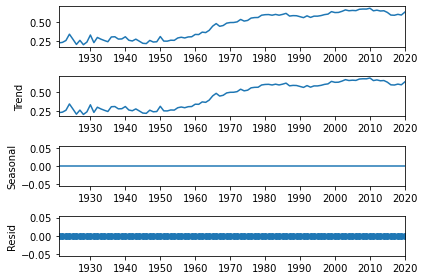

In [35]:
# lo graficamos
plt.figure(figsize=(10,7))
res.plot();

### Time Series Forecasting - ARIMA

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
model = ARIMA(data_energy_s_m, order=(5,1,0))
model_fit = model.fit()

/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [42]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 214.953
Date:                Thu, 17 Dec 2020   AIC                           -417.905
Time:                        17:49:21   BIC                           -402.334
Sample:                    01-01-1921   HQIC                          -411.605
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3183      0.082     -3.867      0.000      -0.480      -0.157
ar.L2         -0.1576      0.085     -1.846      0.065      -0.325       0.010
ar.L3          0.2090      0.100      2.097      0.0

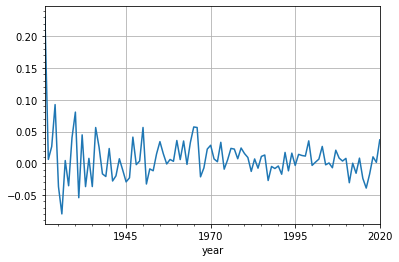

In [43]:
residuals = model_fit.resid
residuals.plot()
plt.grid()
plt.minorticks_on()
plt.show()

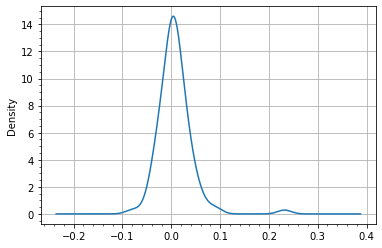

In [44]:
residuals.plot(kind='kde')
plt.grid()
plt.minorticks_on()
plt.show()

In [45]:
# hacemos un .describe para ver la media, desviación estándar
print(residuals.describe())

count    100.000000
mean       0.007434
std        0.035362
min       -0.079958
25%       -0.009742
50%        0.005838
75%        0.022304
max        0.231815
dtype: float64


### evaluate an ARIMA model using a walk-forward validation

In [47]:
# split into train and test sets
X = data_energy_s_m.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [48]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.606469, expected=0.579840
predicted=0.590928, expected=0.585679
predicted=0.593587, expected=0.584046
predicted=0.576090, expected=0.571591
predicted=0.577529, expected=0.559402
predicted=0.566267, expected=0.582864
predicted=0.574760, expected=0.562560
predicted=0.562551, expected=0.578773
predicted=0.582359, expected=0.578580
predicted=0.571723, expected=0.586068
predicted=0.585947, expected=0.598699
predicted=0.593491, expected=0.605198
predicted=0.601563, expected=0.637523
predicted=0.628307, expected=0.625413
predicted=0.624862, expected=0.626986
predicted=0.635079, expected=0.641270
predicted=0.633524, expected=0.660165
predicted=0.650921, expected=0.648868
predicted=0.652660, expected=0.653209
predicted=0.658049, expected=0.650326
predicted=0.648064, expected=0.668305


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.663181, expected=0.671461
predicted=0.666816, expected=0.670749
predicted=0.674178, expected=0.681778
predicted=0.679334, expected=0.648301
predicted=0.657245, expected=0.656571
predicted=0.662026, expected=0.645597
predicted=0.640943, expected=0.648795
predicted=0.650687, expected=0.627064
predicted=0.632488, expected=0.592855
predicted=0.608163, expected=0.590421
predicted=0.591843, expected=0.602435
predicted=0.590952, expected=0.593224
predicted=0.592915, expected=0.631232


### Evaluamos el forecast

In [49]:
# miramos el RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.017


### Hacemos el gráfico entre el forecast y el actual outcome

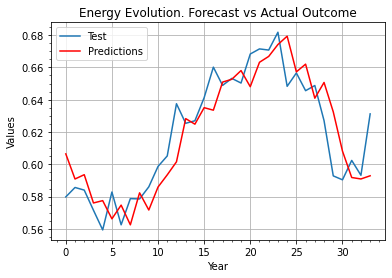

In [50]:
plt.plot(test, label="Test")
plt.plot(predictions, color='red', label="Predictions")
plt.grid()
plt.minorticks_on()
plt.xlabel('Year') 
plt.ylabel('Values')
plt.title("Energy Evolution. Forecast vs Actual Outcome");
plt.legend()